In [61]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.decomposition import PCA, TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.cluster import KMeans, DBSCAN, OPTICS, SpectralClustering, AgglomerativeClustering

from scipy import sparse
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
train = sparse.load_npz("train.npz")

In [4]:
train_df = pd.DataFrame(train)

In [5]:
print(train.shape)

(14590, 77888)


In [6]:
print(train)

  (0, 69973)	0.14695190877085457
  (0, 77397)	0.15368709989844084
  (0, 43728)	0.16111353713159454
  (0, 13827)	0.15584439606015912
  (0, 47876)	0.14695190877085457
  (0, 70134)	0.14433089548991573
  (0, 64578)	0.0796709262326245
  (0, 25736)	0.14099152159385173
  (0, 58584)	0.11611633848131347
  (0, 9908)	0.16111353713159454
  (0, 27452)	0.15584439606015912
  (0, 7706)	0.09661525860632271
  (0, 69972)	0.14695190877085457
  (0, 77380)	0.04930588826158678
  (0, 2177)	0.12341241325765533
  (0, 6296)	0.1484179588270054
  (0, 43727)	0.1484179588270054
  (0, 34974)	0.11747368882458666
  (0, 48575)	0.14695190877085457
  (0, 70484)	0.1365018959451444
  (0, 5507)	0.07829314549363428
  (0, 32561)	0.13103474377910343
  (0, 53167)	0.1373160676655561
  (0, 13824)	0.10030074037382926
  (0, 47875)	0.12302680221782723
  :	:
  (14589, 39933)	0.02535983057619803
  (14589, 68617)	0.02166258558366415
  (14589, 16521)	0.02254617646236455
  (14589, 4409)	0.04118728524247568
  (14589, 30088)	0.0213413922446

Приведем данные к данафрейму

In [7]:
train_df = pd.DataFrame.sparse.from_spmatrix(train)

In [8]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,77878,77879,77880,77881,77882,77883,77884,77885,77886,77887
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Обучим первую модель k-means на 5 кластерах, просто чтобы получить начальное значение метрики и относительно этого значения уже пытаться что-то улучшить.

In [9]:
k_means = KMeans(n_clusters=5)

k_means.fit(train_df)

KMeans(n_clusters=5)

In [10]:
y_pred = k_means.predict(train_df)

Загружаем предсказания модели в файл и посмотрим результат

In [11]:
test_df = pd.DataFrame()

test_df["TARGET"] = k_means.predict(train_df)
test_df["ID"] = [i for i in range(train_df.shape[0])]

test_df[["ID", "TARGET"]].to_csv("cluster.csv", index=False)

!cat cluster.csv | head

ID,TARGET
0,1
1,1
2,1
3,2
4,3
5,3
6,2
7,1
8,2


И тут произошло неожиданное, `Score` получился равен 0.12717600475413968

Я не ожидал такого высокого скора, первая модель изначально планировалась чтобы просто получить начальное представление о метрике. Насколько я понял, мне просто повезло и k-means очень удачно выбрал начальное положение центроидов. Из-за этого такое высокое значение метрики, которое мне не удалось привзойти другими более сложными моделями

## Визуализация данных

### SVD

In [12]:
svd = TruncatedSVD(n_components=2)
svd_df = svd.fit_transform(train)

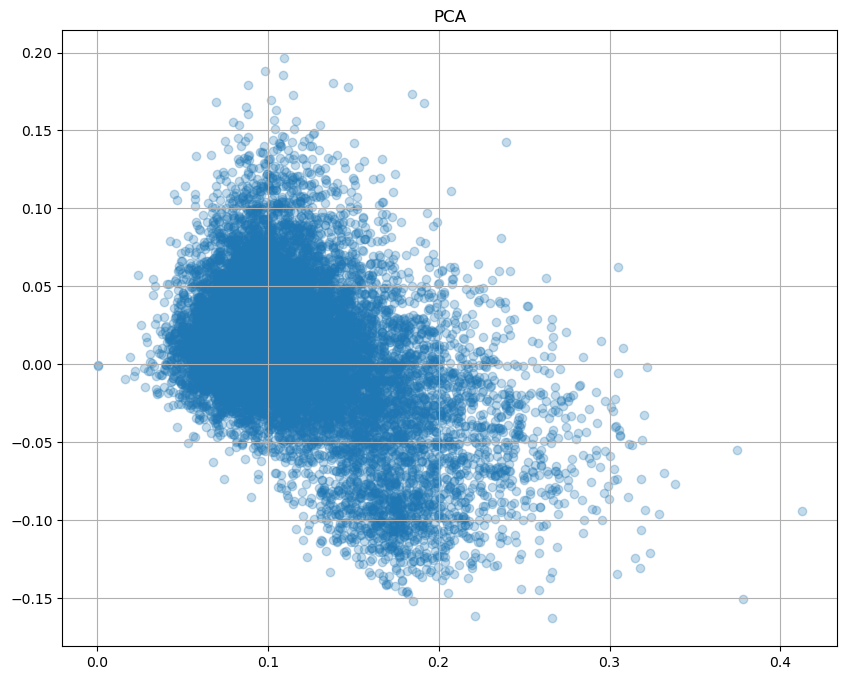

In [13]:
plt.figure(figsize=[10, 8])
plt.scatter(svd_df[:, 0], svd_df[:, 1], alpha=0.27, c=None )
plt.title("PCA")
plt.grid()
plt.show()

### Поиграемся с параметрами для K-means

Обучим модель на данных, полученных с помощью метода svd

In [24]:
k_means = KMeans(n_clusters=7, algorithm='lloyd', init='k-means++', max_iter=1000)

k_means.fit(svd_df)

KMeans(max_iter=1000, n_clusters=7)

In [25]:
kmeans_pred_res = k_means.predict(svd_df)

## Визуализируем результат работы модели

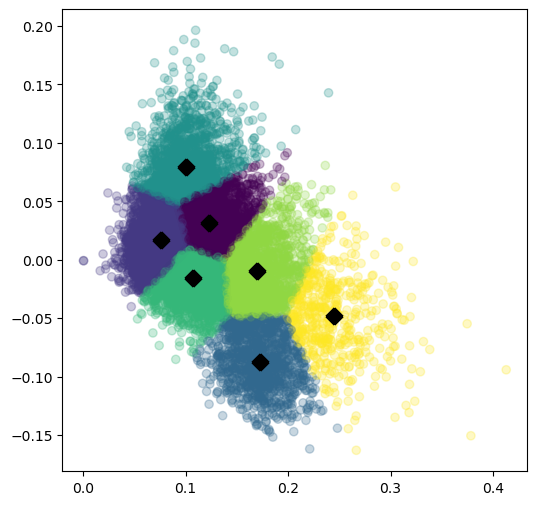

In [30]:
plt.figure(figsize=[6, 6])
centroids = k_means.cluster_centers_
plt.scatter(svd_df[:, 0], svd_df[:, 1], alpha=0.27, c=kmeans_pred_res )
plt.scatter(centroids[:, 0], centroids[:, 1], linewidths=10, marker ="x", color='black')
plt.show()

In [31]:
test_df = pd.DataFrame()

test_df["TARGET"] = kmeans_pred_res
test_df["ID"] = [i for i in range(train_df.shape[0])]

test_df[["ID", "TARGET"]].to_csv("cluster.csv", index=False)

!cat cluster.csv | head

ID,TARGET
0,1
1,1
2,1
3,5
4,0
5,1
6,2
7,4
8,4


Score: -0.004373616883889224
(Стало сильно хуже)

Обучим на исходных данных

In [32]:
k_menas_od = KMeans(n_clusters=6, algorithm='lloyd', init='random', max_iter=1000)
k_menas_od.fit(train_df)
k_menas_od_labels = k_menas_od.predict(train_df)

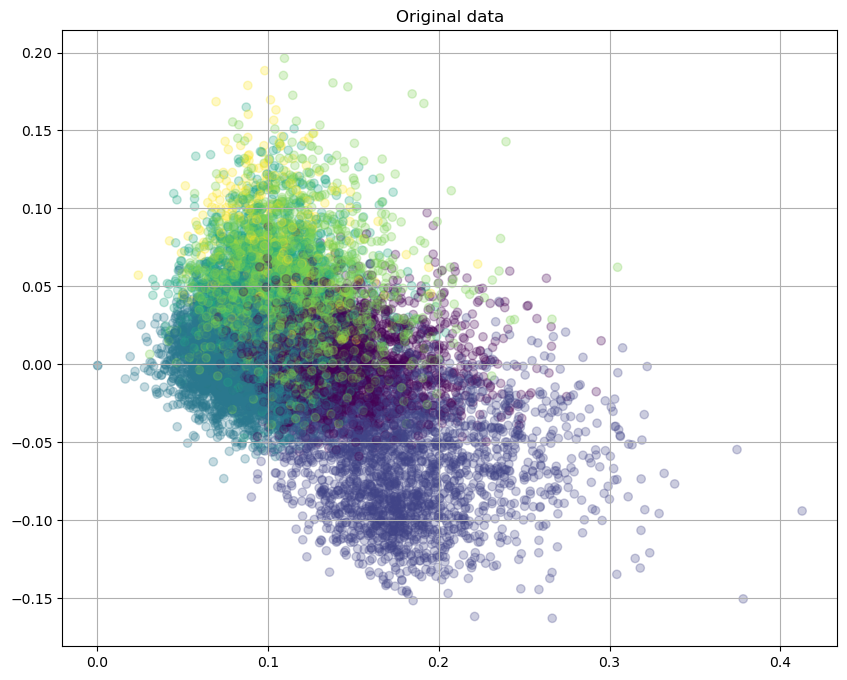

In [33]:
plt.figure(figsize=[10, 8])
plt.scatter(svd_df[:, 0], svd_df[:, 1], alpha=0.27, c=k_menas_od_labels)
plt.title("Original data")
plt.grid()
plt.show()

In [34]:
test_df = pd.DataFrame()

test_df["TARGET"] = k_menas_od_labels
test_df["ID"] = [i for i in range(train_df.shape[0])]

test_df[["ID", "TARGET"]].to_csv("cluster.csv", index=False)

!cat cluster.csv | head

ID,TARGET
0,2
1,2
2,0
3,1
4,3
5,2
6,1
7,2
8,1


Score: 0.03772432105515894

### **Преимущества и недостатки K-Means**
Преимущества:
- прост в реализации и понимании;
- наличие большого числа модификаций;
- высокая скорость работы и точность на данных сферической формы.

Недостатки:
- низкая точность на данных с несферической формой кластеров;
- чувствительность к начальным значениям центроидов и выбросам;
- необходимость заранее устанавливать число кластеров, что может быть сложно или не оптимально.

## Попробуем другие модели

### Агломеративная кластеризация

Алгломеративная кластеризация — это метод иерархической кластеризации, который объединяет объекты в кластеры на основе их близости. Процесс кластеризации начинается с того, что изначально каждый объект считается отдельным кластером, а затем на каждом шаге два наиболее близких кластера сливаются в один, пока не будет достигнуто желаемое число кластеров или один общий кластер.

In [44]:
ac = AgglomerativeClustering(n_clusters=5, linkage='ward')
ac_labels = ac.fit_predict(svd_df)

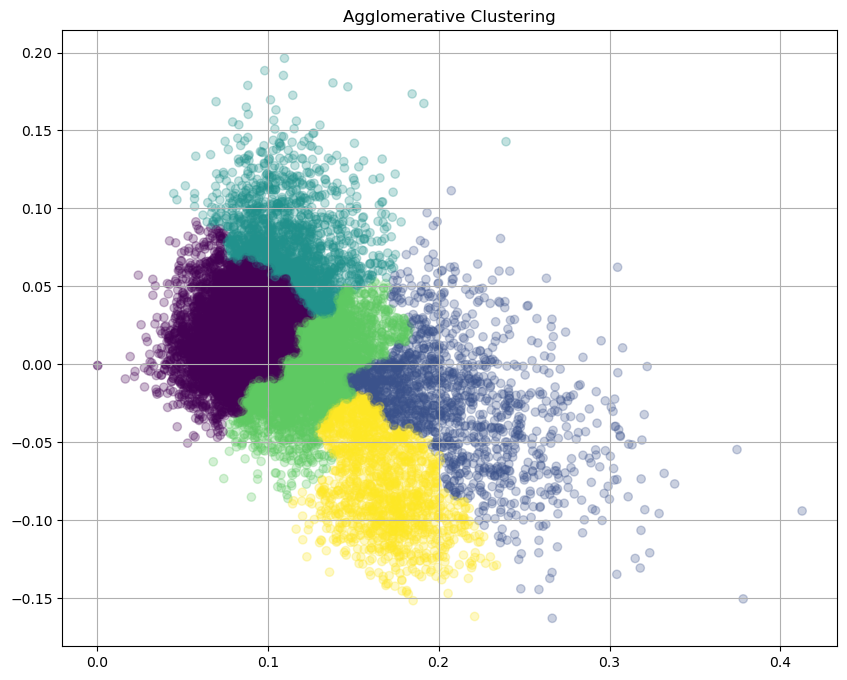

In [45]:
plt.figure(figsize=[10, 8])
plt.scatter(svd_df[:, 0], svd_df[:, 1], alpha=0.27, c=ac_labels)
plt.title("Agglomerative Clustering")
plt.grid()
plt.show()

In [46]:
test_df = pd.DataFrame()

test_df["TARGET"] = ac_labels
test_df["ID"] = [i for i in range(train_df.shape[0])]

test_df[["ID", "TARGET"]].to_csv("cluster.csv", index=False)

!cat cluster.csv | head

ID,TARGET
0,0
1,0
2,0
3,1
4,0
5,0
6,4
7,3
8,4
cat: stdout: Broken pipe


Score: -0.024749439079292074

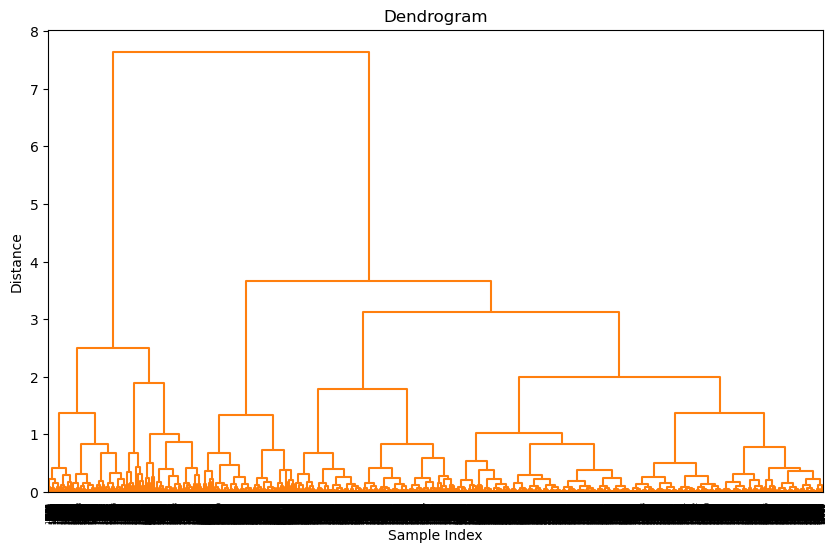

In [62]:
linkage_matrix = linkage(svd_df, method='ward', metric='euclidean')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, color_threshold=10)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

### **Преимущества и недостатки аглометративной кластеризации**
Преимущества:
- адаптация к различным ситуациям и способность обнаружения кластеров произвольной формы;
- возможность формирования информативной иерархии кластеров, которая позволяет выбирать оптимальное число кластеров или лучше изучать структуру данных.

Недостатки:
- использование большого количества вычислительных ресурсов и памяти из-за работы со всей матрицей расстояний между объектами;
- чувствительность к выбору критерия объединения кластеров, а также неустойчивость к шуму и выбросам, что может сильно искажать иерархию кластеров.


## Спектральная кластеризация

Спектральная кластеризация — метод кластеризации на основе спектральных свойств матрицы сходства графа, который представляет собой набор точек данных, связанных друг с другом в зависимости от их сходства. Основная идея заключается в преобразовании матрицы сходства графа в лаплассиан для получения его собственных векторов, которые в дальнейшем используются для проекции данных в новое пространство более низкой размерности для лучшей разделимости, где затем применяется другой метод кластеризации, например, такой как k-средних.

К сожалению спектральная кластеризация слишком долго работает на моем устройстве, поэтому оценить результат ее работы не получилось.

In [63]:
sc = SpectralClustering(n_clusters=5, gamma=10, random_state=0)
sc_labels = sc.fit_predict(train_df)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=[10, 8])
plt.scatter(svd_df[:, 0], svd_df[:, 1], alpha=0.27, c=sc_labels)
plt.title("Spectral Clustering")
plt.grid()
plt.show()

In [ ]:
test_df = pd.DataFrame()

test_df["TARGET"] = sc_labels
test_df["ID"] = [i for i in range(train_df.shape[0])]

test_df[["ID", "TARGET"]].to_csv("cluster.csv", index=False)

!cat cluster.csv | head

Score: 

### **Преимущества и недостатки спектральной кластеризации**
Преимущества:
- работа с кластерами сложных форм;
- возможность обработки многомерных данных из-за понижения размерности перед их кластеризацией;
- устойчивость к выбросам и шуму в данных из-за учёта их глобальной структуры, а не только локальной.

Недостатки:
- сложность конфигурации из-за большого количества гиперпараметров;
- высокая вычислительная сложность и потребление памяти при работе с большими объемами данных, что может быть частично решено с помощью безматричных методов или случайных проекций.


## DBSCAN

Более интересным алгоритмом кластеризации является DBSCAN (Density-Based Spatial Clustering of Applications with Noise), который основан на плотности точек в пространстве. Он группирует вместе точки, которые находятся близко друг к другу и отмечает как выбросы точки, которые лежат в областях с низкой плотностью. Помимо того, что DBSCAN может обнаруживать кластеры произвольной формы и выбросы в данных, его главная особенность заключается в самостоятельном определении необходимого количества кластеров, что избавляет от необходимости в их подборе.

Для вычисления попарных расстояний и ближайших соседей точек в DBSCAN используется модифицированная реализация k-ближайших соседей, которая является алгоритмом обучения без учителя и представлена в scikit-learn в виде класса NearestNeighbors.

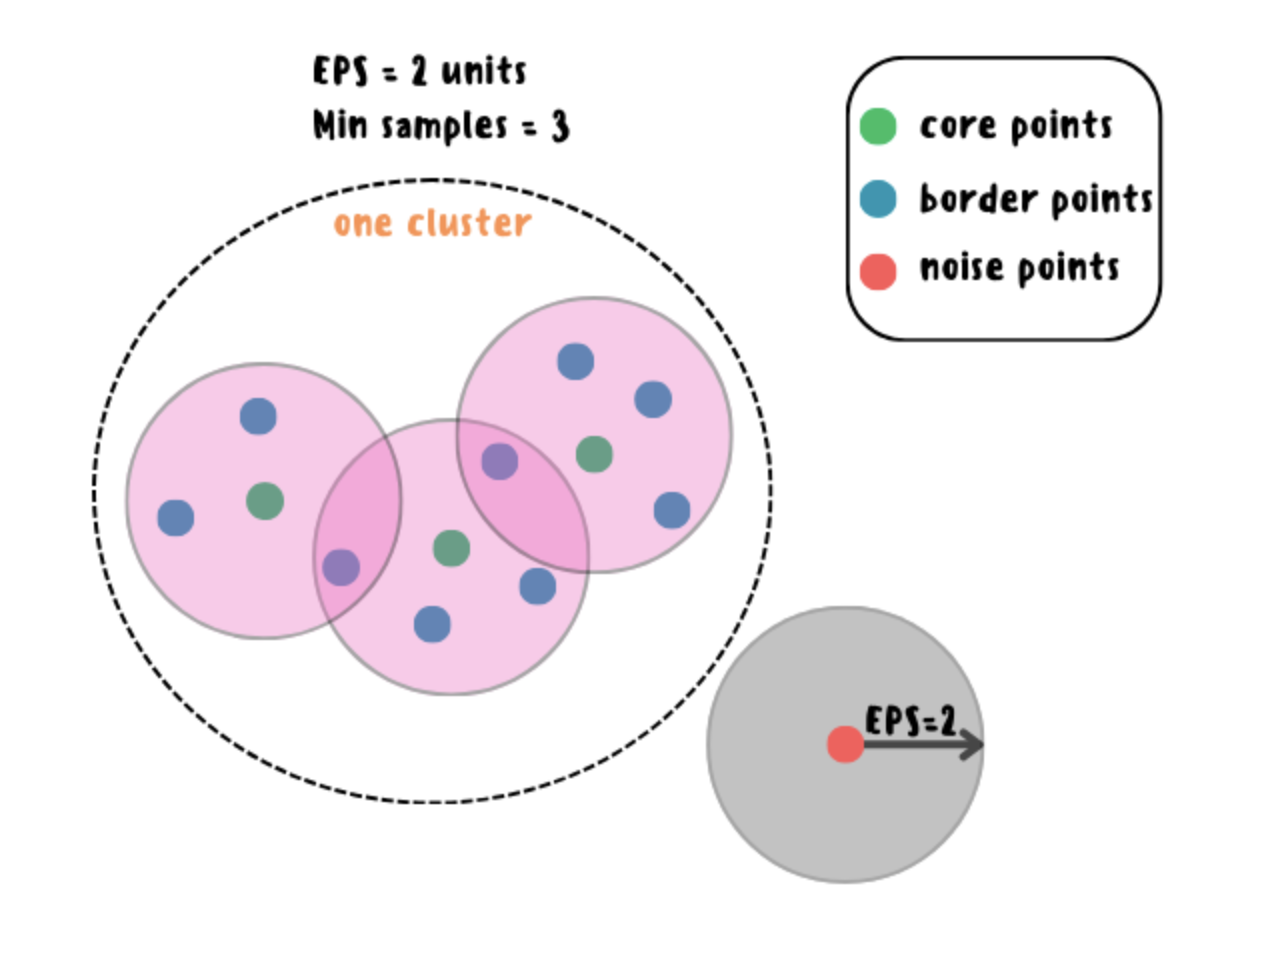

In [69]:
dbscan = DBSCAN(eps=0.3, min_samples=3)
dbscan_labels = dbscan.fit_predict(train_df)

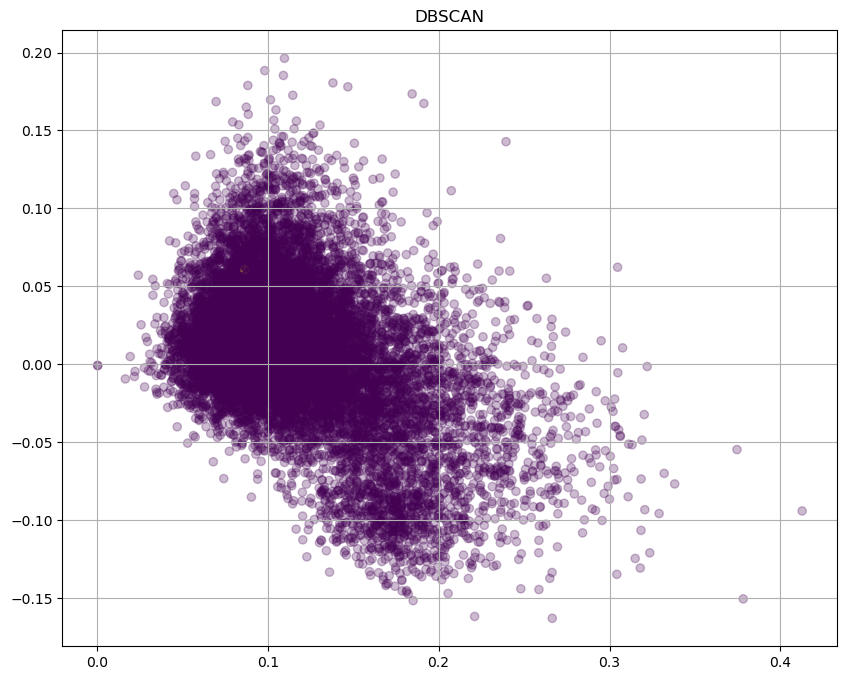

In [70]:
plt.figure(figsize=[10, 8])
plt.scatter(svd_df[:, 0], svd_df[:, 1], alpha=0.27, c=dbscan_labels)
plt.title("DBSCAN")
plt.grid()
plt.show()

как видно DBSCAN плохо отработал и не выделил кластеров, определяя все точки как шум. Это можно исправить поигравшись с гиперпараметрами.

In [67]:
test_df = pd.DataFrame()

test_df["TARGET"] = dbscan_labels
test_df["ID"] = [i for i in range(train_df.shape[0])]

test_df[["ID", "TARGET"]].to_csv("cluster.csv", index=False)

!cat cluster.csv | head

ID,TARGET
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1


Score: -0.0001798136992701532

### **Преимущества и недостатки DBSCAN**
Преимущества:
- устойчив к выбросам;
- не требуется заранее указывать количество кластеров;
- способность находить кластеры произвольной формы, а также шумные точки в данных.

Недостатки:
- плохая работа с кластерами разной плотности;
- требуется большой объём памяти для хранения расстояний между всеми точками;
- высокая чувствительность к выбору параметров eps и min_samples, что может сильно повлиять на качество кластеризации в негативную сторону.

# **Вывод**
Лучший `Score` который удалось получить - `0.127`, используя обычный k-means на 5 кластеров. Для визуализации и обучения некоторых моделей использовался метод снижения размерности - SVD. В рамках этого домашнего задания были приминены и рассмотрены разные методы кластеризации, принципы их работы, а также их приемущества и недостатки.